In [68]:
import os

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import LinearRegression, Lasso, Ridge, SGDRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [5]:
os.environ['KAGGLE_CONFIG_DIR'] = "/content"

In [6]:
!kaggle datasets download -d lainguyn123/student-performance-factors

Dataset URL: https://www.kaggle.com/datasets/lainguyn123/student-performance-factors
License(s): CC0-1.0
  0% 0.00/93.9k [00:00<?, ?B/s]
100% 93.9k/93.9k [00:00<00:00, 34.4MB/s]


In [7]:
!unzip student-performance-factors.zip

Archive:  student-performance-factors.zip
  inflating: StudentPerformanceFactors.csv  


In [8]:
df = pd.read_csv('StudentPerformanceFactors.csv')
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [9]:
df.shape

(6607, 20)

In [10]:
df[df.columns[df.dtypes == 'int64']]

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
0,23,84,7,73,0,3,67
1,19,64,8,59,2,4,61
2,24,98,7,91,2,4,74
3,29,89,8,98,1,4,71
4,19,92,6,65,3,4,70
...,...,...,...,...,...,...,...
6602,25,69,7,76,1,2,68
6603,23,76,8,81,3,2,69
6604,20,90,6,65,3,2,68
6605,10,86,6,91,2,3,68


<Axes: >

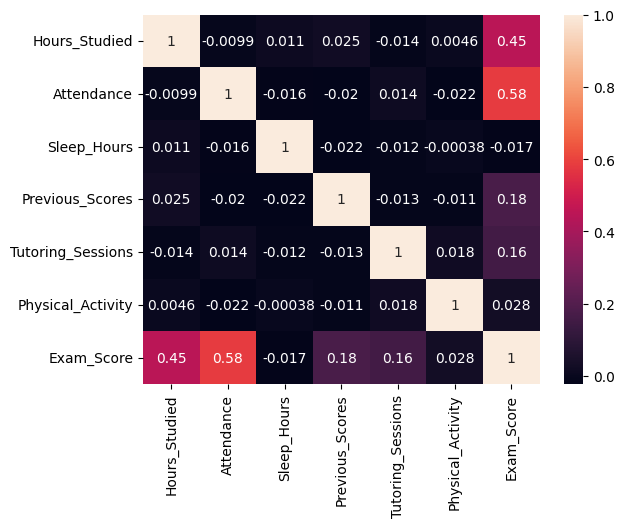

In [11]:
corr_df = df[df.columns[df.dtypes == 'int64']].corr()
sns.heatmap(corr_df, annot=True)

In [12]:
'Low' in df['Access_to_Resources'].unique()

True

In [13]:
order_level = ['Low', 'Medium', 'High']
order_rew = ['Negative', 'Neutral', 'Positive']
education_Level	= ['High School', 'College', 'Postgraduate']
distance_level = ['Near', 'Moderate', 'Far']

In [14]:
le = LabelEncoder()
def encode_cols(col):
  if col.dtype != '':
      if 'Low' in col.unique():
          return col.map({val: i for i, val in enumerate(order_level)})
      elif 'Negative' in col.unique():
          return col.map({val: i for i, val in enumerate(order_rew)})
      elif 'High School' in col.unique():
          return col.map({val: i for i, val in enumerate(education_Level)})
      elif 'Near' in col.unique():
          return col.map({val: i for i, val in enumerate(distance_level)})
      else:
          return le.fit_transform(col)
  return col

In [15]:
df_copy = df.copy()

In [16]:
df_copy= df_copy.apply(lambda col: encode_cols(col), axis=0)

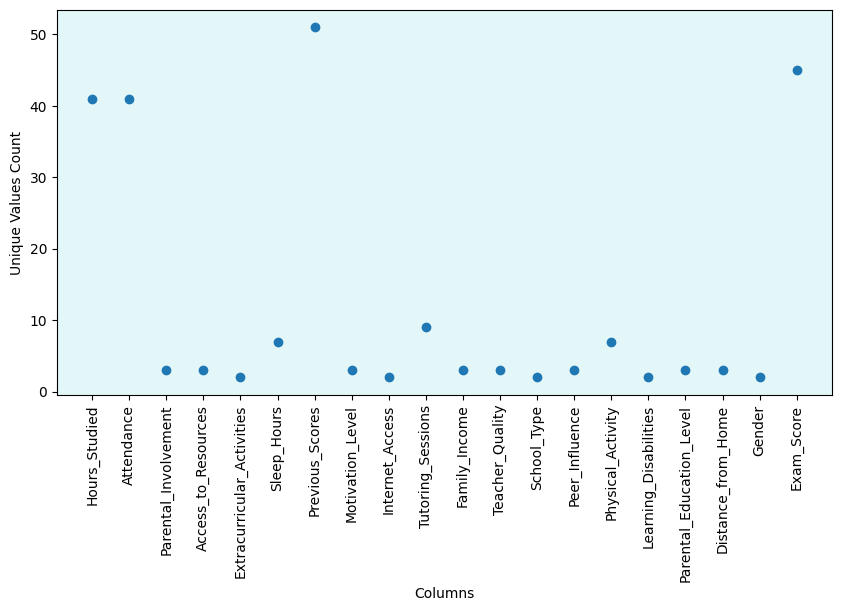

In [106]:
plt.figure(figsize=(10, 5))
plt.gca().set_facecolor('#e3f7f8')
plt.scatter(df_copy.columns, df_copy.nunique())
plt.xticks(rotation=90)
plt.xlabel("Columns")
plt.ylabel("Unique Values Count")
plt.show()

In [17]:
corr_df = df_copy.corr()

<Axes: >

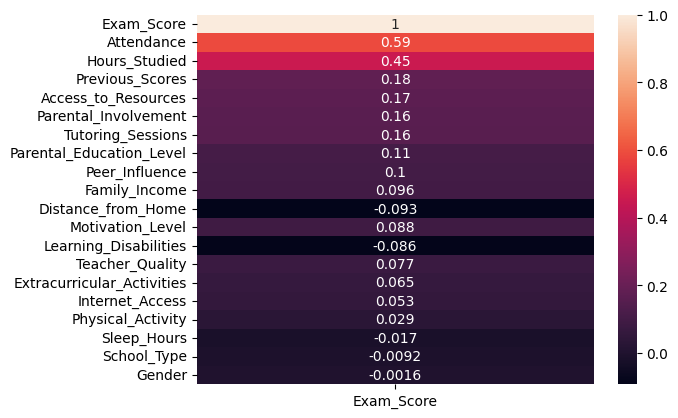

In [18]:
exam_score_corr = corr_df[['Exam_Score']].sort_values(by='Exam_Score', ascending=False, key=abs)
sns.heatmap(exam_score_corr, annot=True)

In [19]:
df_copy.isna().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


array([[<Axes: title={'center': 'Teacher_Quality'}>,
        <Axes: title={'center': 'Parental_Education_Level'}>],
       [<Axes: title={'center': 'Distance_from_Home'}>, <Axes: >]],
      dtype=object)

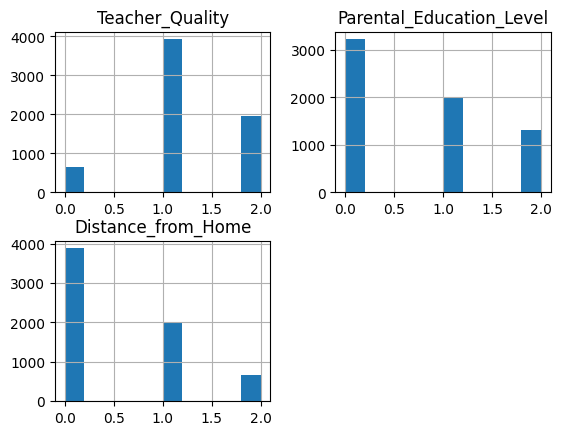

In [20]:
df_copy[['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']].hist()

In [21]:
df_copy[df_copy.isna().any(axis=1)]

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
33,13,0,2,1,0,1,0,1,1,2,1,1.0,1,1,3,0,1.0,NaN,0,6
127,16,37,1,1,0,4,39,1,1,1,0,NaN,1,1,4,0,0.0,2.0,1,14
240,14,27,0,1,0,0,4,1,1,1,1,1.0,1,1,6,0,NaN,1.0,1,10
275,22,22,0,1,1,4,44,1,1,1,1,1.0,1,0,2,1,0.0,NaN,1,11
316,23,30,0,0,0,3,33,1,1,0,0,1.0,0,2,3,0,1.0,NaN,1,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6502,22,4,1,1,0,3,25,1,1,2,1,2.0,1,2,2,0,NaN,0.0,0,11
6579,8,24,1,1,0,2,24,1,1,5,2,NaN,1,1,2,0,0.0,0.0,1,12
6589,21,30,0,2,0,1,49,1,1,1,0,0.0,0,2,2,0,1.0,NaN,0,15
6594,8,30,2,2,1,3,29,0,1,4,2,2.0,1,2,4,0,0.0,NaN,1,15


In [22]:
df_copy[['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']] = df_copy[['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']].fillna(df_copy[['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']].median())

In [23]:
df_copy[['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']].isna().sum()

,0
Teacher_Quality,0
Parental_Education_Level,0
Distance_from_Home,0


In [24]:
X = df_copy.drop('Exam_Score', axis=1)
y = df_copy['Exam_Score']

In [25]:
X_tr, X_val, y_tr, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
scaler_norm = MinMaxScaler()
X_tr_normalized = scaler_norm.fit_transform(X_tr)
X_val_normalized = scaler_norm.transform(X_val)

In [71]:
scaler_stand = StandardScaler()
X_tr_scaled = scaler_stand.fit_transform(X_tr)
X_val_scaled = scaler_stand.transform(X_val)

In [26]:
print(f'X train shape: {X_tr.shape}', end='\t')
print(f'y train shape: {y_tr.shape}')
print(f'X validation shape: {X_val.shape}', end='\t')
print(f'y validation shape: {y_val.shape}')

X train shape: (5285, 19)	y train shape: (5285,)
X validation shape: (1322, 19)	y validation shape: (1322,)


In [77]:
linera_reg_model = LinearRegression()
cv_score = cross_val_score(linera_reg_model, X_tr, y_tr, cv=5)

cv_score_norm = cross_val_score(linera_reg_model, X_tr_normalized, y_tr, cv=5)

cv_score_stan = cross_val_score(linera_reg_model, X_tr_scaled, y_tr, cv=5)

print(f"Cross-validation mean scores (base data): {cv_score.mean()}")
print(f"Cross-validation median scores (base data): {np.median(cv_score)}")
print("\n")
print(f"Cross-validation mean scores (normalized data): {cv_score_norm.mean()}")
print(f"Cross-validation median scores (normalized data): {np.median(cv_score_norm)}")
print("\n")
print(f"Cross-validation mean scores (scaled data): {cv_score_stan.mean()}")
print(f"Cross-validation median scores (scaled data): {np.median(cv_score_stan)}")

Cross-validation mean scores (base data): 0.7457651596867427
Cross-validation median scores (base data): 0.761201732518745


Cross-validation mean scores (normalized data): 0.7457651596867427
Cross-validation median scores (normalized data): 0.761201732518745


Cross-validation mean scores (scaled data): 0.7457651596867427
Cross-validation median scores (scaled data): 0.761201732518745


In [108]:
linera_reg_model = LinearRegression()
linera_reg_model.fit(X_tr, y_tr)
y_pred_linear_reg = linera_reg_model.predict(X_val)

In [109]:
print(f'MAE: {mean_absolute_error(y_true=y_val, y_pred=y_pred_linear_reg)}')
print(f'MSE: {mean_squared_error(y_true=y_val, y_pred=y_pred_linear_reg)}')
print(f'R2: {r2_score(y_true=y_val, y_pred=y_pred_linear_reg)}')

MAE: 0.43289212798116783
MSE: 2.903463440509907
R2: 0.7894843584449396


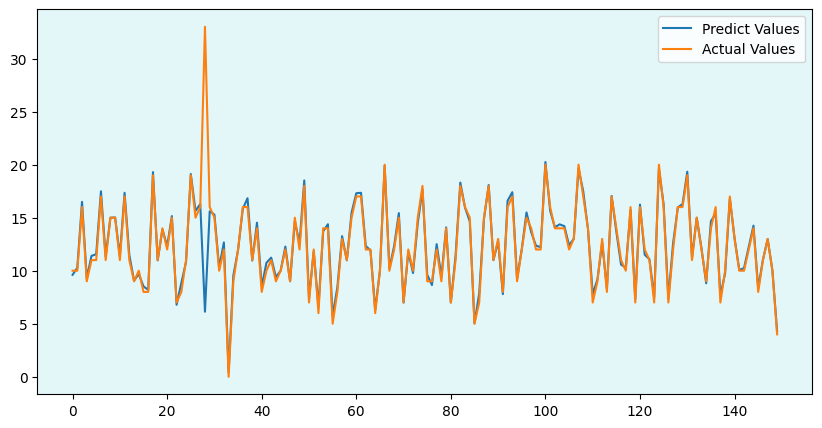

In [110]:
plt.figure(figsize=(10, 5))
plt.gca().set_facecolor('#e3f7f8')
plt.plot(y_pred_linear_reg[:150], label = 'Predict Values')
plt.plot(y_val.values[:150], label = 'Actual Values')
plt.legend()

In [ ]:
AdaB_reg_model = AdaBoostRegressor(n_estimators=100, random_state=42)
AdaB_reg_model.fit(X_tr, y_tr)
cv_score = cross_val_score(AdaB_reg_model, X_tr, y_tr, cv=5)
print(f"Cross-validation mean scores: {cv_score.mean()}")
print(f"Cross-validation median scores: {np.median(cv_score)}")

Cross-validation mean scores: -1.7824987711813178
Cross-validation median scores: -1.9751368676191032


In [111]:
AdaB_reg_model = AdaBoostRegressor(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.005, 0.01, 0.1, 0.5],
}
grid_search = GridSearchCV(estimator=AdaB_reg_model, param_grid=param_grid, cv=5)
grid_search.fit(X_tr, y_tr)

print(grid_search.best_score_)
print(grid_search.best_estimator_)

0.48320598367184237
AdaBoostRegressor(learning_rate=0.005, n_estimators=100, random_state=42)


In [112]:
y_pred_AdaB_reg = grid_search.predict(X_val)

In [113]:
print(f'MAE: {mean_absolute_error(y_true=y_val, y_pred=y_pred_AdaB_reg)}')
print(f'MSE: {mean_squared_error(y_true=y_val, y_pred=y_pred_AdaB_reg)}')
print(f'R2: {r2_score(y_true=y_val, y_pred=y_pred_AdaB_reg)}')

MAE: 1.7123205900818468
MSE: 6.609486677559212
R2: 0.5207791119864611


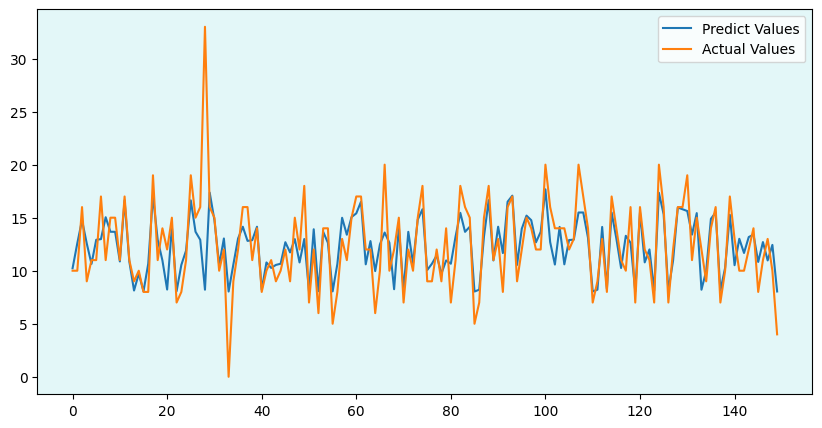

In [114]:
plt.figure(figsize=(10, 5))
plt.gca().set_facecolor('#e3f7f8')
plt.plot(y_pred_AdaB_reg[:150], label = 'Predict Values')
plt.plot(y_val.values[:150], label = 'Actual Values')
plt.legend()

In [ ]:
dtr_reg_model = DecisionTreeRegressor(random_state=42)
cv_score = cross_val_score(dtr_reg_model, X_tr, y_tr, cv=5)
print(f"Cross-validation mean scores: {cv_score.mean()}")
print(f"Cross-validation median scores: {np.median(cv_score)}")

Cross-validation mean scores: 0.10968210847316542
Cross-validation median scores: 0.12022355890510517


In [ ]:
dtr_reg_model = DecisionTreeRegressor(random_state=42)
param_grid = {
    'max_depth': [3, 5, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': [None, 'sqrt', 'log2'],
}
grid_search = GridSearchCV(estimator=dtr_reg_model, param_grid=param_grid, cv=10)
grid_search.fit(X_tr, y_tr)

print(grid_search.best_score_)
print(grid_search.best_estimator_)

0.5238380720146452
DecisionTreeRegressor(max_depth=5, min_samples_leaf=5, random_state=42)


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [91]:
dtr_reg_model = DecisionTreeRegressor(max_depth=5, min_samples_leaf=5, random_state=42)
dtr_reg_model.fit(X_tr, y_tr)
y_pred_dtr_reg = grid_search.predict(X_val)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(


In [115]:
print(f'MAE: {mean_absolute_error(y_true=y_val, y_pred=y_pred_dtr_reg)}')
print(f'MSE: {mean_squared_error(y_true=y_val, y_pred=y_pred_dtr_reg)}')
print(f'R2: {r2_score(y_true=y_val, y_pred=y_pred_dtr_reg)}')

MAE: 7.94197508788154
MSE: 72.84367058831866
R2: -4.281530958224258


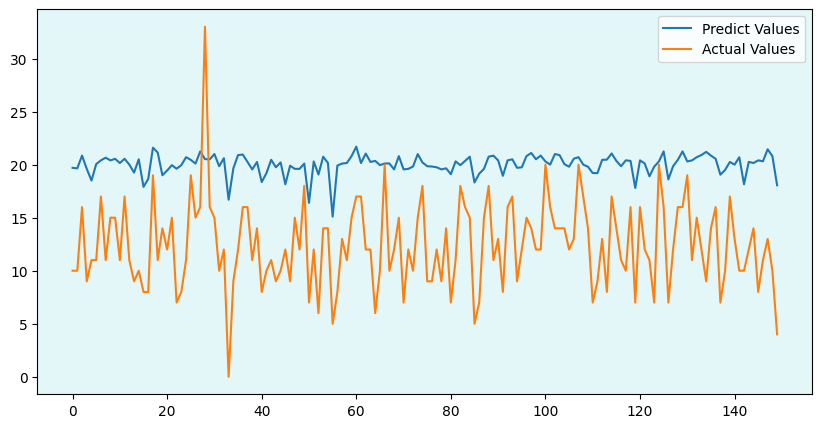

In [116]:
plt.figure(figsize=(10, 5))
plt.gca().set_facecolor('#e3f7f8')
plt.plot(y_pred_dtr_reg[:150], label = 'Predict Values')
plt.plot(y_val.values[:150], label = 'Actual Values')
plt.legend()

In [ ]:
lasso_reg_model = Lasso()
cv_score = cross_val_score(lasso_reg_model, X_tr, y_tr, cv=5)
print(f"Cross-validation mean scores: {cv_score.mean()}")
print(f"Cross-validation median scores: {np.median(cv_score)}")

Cross-validation mean scores: 0.5820860017931726
Cross-validation median scores: 0.613826984976414


In [117]:
lasso_reg_model = Lasso()
param_grid = {
 'alpha': np.arange(0.01, 1.0, 0.01)
 }
grid_search = GridSearchCV(lasso_reg_model, param_grid=param_grid, cv=5)
grid_search.fit(X_tr, y_tr)
print(grid_search.best_score_)
print(grid_search.best_estimator_)

0.7457886423361885
Lasso(alpha=0.01)


In [118]:
y_pred_lasso_reg = grid_search.predict(X_val)
print(f'MAE: {mean_absolute_error(y_true=y_val, y_pred=y_pred_lasso_reg)}')
print(f'MSE: {mean_squared_error(y_true=y_val, y_pred=y_pred_lasso_reg)}')
print(f'R2: {r2_score(y_true=y_val, y_pred=y_pred_lasso_reg)}')

MAE: 0.434977283251602
MSE: 2.9007119470218634
R2: 0.7896838555037929


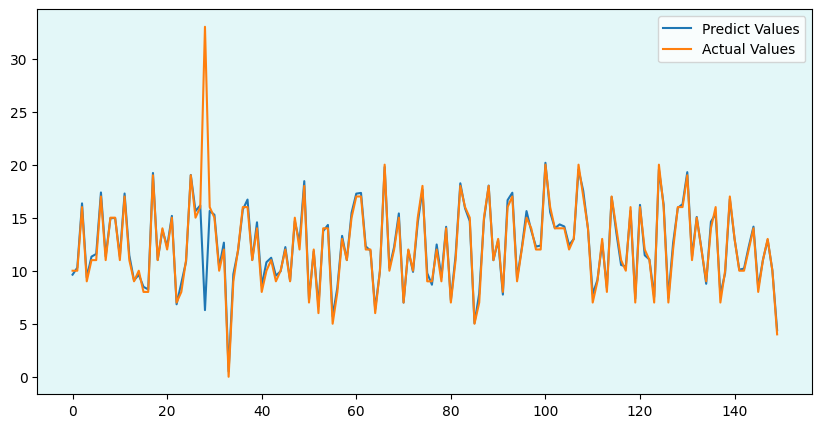

In [119]:
plt.figure(figsize=(10, 5))
plt.gca().set_facecolor('#e3f7f8')
plt.plot(y_pred_lasso_reg[:150], label = 'Predict Values')
plt.plot(y_val.values[:150], label = 'Actual Values')
plt.legend()

In [27]:
rf_reg_model = RandomForestRegressor(random_state=42)
cv_score = cross_val_score(rf_reg_model, X_tr, y_tr, cv=5)
print(f"Cross-validation mean scores: {cv_score.mean()}")
print(f"Cross-validation median scores: {np.median(cv_score)}")

Cross-validation mean scores: 0.6460492252557166
Cross-validation median scores: 0.682383332952612


In [ ]:
rf_reg_model = RandomForestRegressor(random_state=42)
param_grid ={
 'max_depth': [12, 14, 16, 18, 20],
 'max_features': ['log2', 'sqrt'],
 'min_samples_leaf': [1, 2, 5],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [300, 400, 500]}
grid_search = GridSearchCV(rf_reg_model, param_grid=param_grid, cv=5)
grid_search.fit(X_tr, y_tr)
print(grid_search.best_score_)
print(grid_search.best_estimator_)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


0.6630862275391657
RandomForestRegressor(max_depth=20, max_features='log2', n_estimators=500,
                      random_state=42)


In [79]:
gb_reg_model = GradientBoostingRegressor(random_state=42)
cv_score = cross_val_score(gb_reg_model, X_tr, y_tr, cv=5)

cv_score_norm = cross_val_score(gb_reg_model, X_tr_normalized, y_tr, cv=5)

cv_score_stan = cross_val_score(gb_reg_model, X_tr_scaled, y_tr, cv=5)

print(f"Cross-validation mean scores (base data): {cv_score.mean()}")
print(f"Cross-validation median scores (base data): {np.median(cv_score)}")
print("\n")
print(f"Cross-validation mean scores (normalized data): {cv_score_norm.mean()}")
print(f"Cross-validation median scores (normalized data): {np.median(cv_score_norm)}")
print("\n")
print(f"Cross-validation mean scores (scaled data): {cv_score_stan.mean()}")
print(f"Cross-validation median scores (scaled data): {np.median(cv_score_stan)}")

Cross-validation mean scores (base data): 0.7072907031342762
Cross-validation median scores (base data): 0.7277108201766973


Cross-validation mean scores (normalized data): 0.707291619792447
Cross-validation median scores (normalized data): 0.7277108201766973


Cross-validation mean scores (scaled data): 0.7072863758551068
Cross-validation median scores (scaled data): 0.7277108201766973


In [38]:
gb_reg_model = GradientBoostingRegressor(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 3, 5, 10],
    'max_features': ['sqrt', 'log2', None]
}

# Use GridSearchCV or RandomizedSearchCV
grid_search = RandomizedSearchCV(estimator=gb_reg_model, param_distributions=param_grid, cv=5,n_iter=320, n_jobs=-1, random_state=42)
grid_search.fit(X_tr, y_tr)
print(grid_search.best_score_)
print(grid_search.best_estimator_)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


0.7303137818031215
GradientBoostingRegressor(learning_rate=0.05, max_features='sqrt',
                          min_samples_leaf=3, min_samples_split=10,
                          n_estimators=500, random_state=42)


In [39]:
y_pred_gb_reg = grid_search.predict(X_val)
print(f'MAE: {mean_absolute_error(y_true=y_val, y_pred=y_pred_gb_reg)}')
print(f'MSE: {mean_squared_error(y_true=y_val, y_pred=y_pred_gb_reg)}')
print(f'R2: {r2_score(y_true=y_val, y_pred=y_pred_gb_reg)}')

MAE: 0.5979071129530897
MSE: 3.0919103606431935
R2: 0.7758210128909941


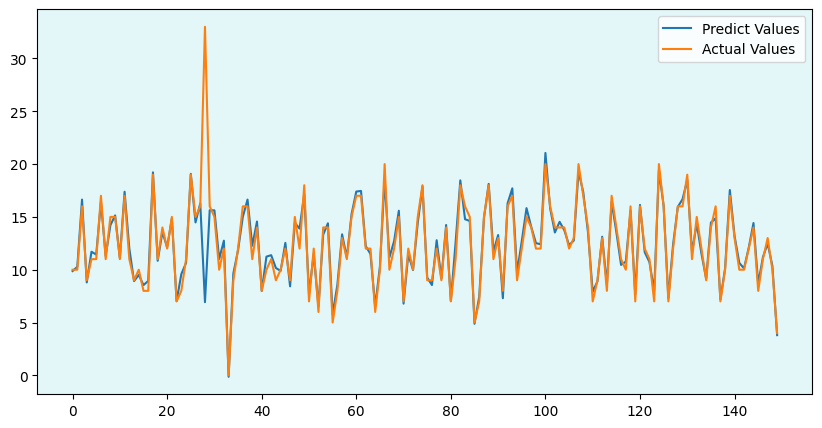

In [120]:
plt.figure(figsize=(10, 5))
plt.gca().set_facecolor('#e3f7f8')
plt.plot(y_pred_gb_reg[:150], label = 'Predict Values')
plt.plot(y_val.values[:150], label = 'Actual Values')
plt.legend()

In [42]:
ridge_reg_model = Ridge()
cv_score = cross_val_score(ridge_reg_model, X_tr, y_tr, cv=5)
print(f"Cross-validation mean scores: {cv_score.mean()}")
print(f"Cross-validation median scores: {np.median(cv_score)}")

Cross-validation mean scores: 0.7457687279242389
Cross-validation median scores: 0.7612066831963928


In [43]:
ridge_reg_model = Ridge()
param_grid = {
 'alpha': np.arange(0.01, 1.0, 0.01)
 }
grid_search = GridSearchCV(ridge_reg_model, param_grid=param_grid, cv=5)
grid_search.fit(X_tr, y_tr)
print(grid_search.best_score_)
print(grid_search.best_estimator_)

0.7457686934569474
Ridge(alpha=0.99)


In [44]:
y_pred_ridge_reg = grid_search.predict(X_val)
print(f'MAE: {mean_absolute_error(y_true=y_val, y_pred=y_pred_ridge_reg)}')
print(f'MSE: {mean_squared_error(y_true=y_val, y_pred=y_pred_ridge_reg)}')
print(f'R2: {r2_score(y_true=y_val, y_pred=y_pred_ridge_reg)}')

MAE: 0.4328731018579768
MSE: 2.903343498045562
R2: 0.7894930548743414


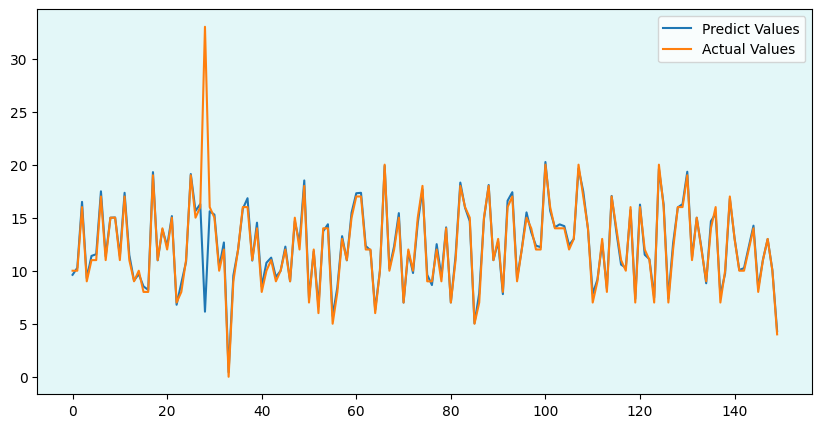

In [121]:
plt.figure(figsize=(10, 5))
plt.gca().set_facecolor('#e3f7f8')
plt.plot(y_pred_ridge_reg[:150], label = 'Predict Values')
plt.plot(y_val.values[:150], label = 'Actual Values')
plt.legend()

In [52]:
sgd_reg_model = SGDRegressor(max_iter=5000)
cv_score = cross_val_score(sgd_reg_model, X_tr, y_tr, cv=5)
print(f"Cross-validation mean scores: {cv_score.mean()}")
print(f"Cross-validation median scores: {np.median(cv_score)}")

Cross-validation mean scores: 0.6719158780654848
Cross-validation median scores: 0.7032088825220391


In [59]:
sgd_reg_model = SGDRegressor(max_iter=5000)
param_grid = {
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': [1e-4, 1e-3, 1e-2, 0.1, 1],
    'epsilon': [0.1, 0.01, 0.001]
    }
grid_search = GridSearchCV(sgd_reg_model, param_grid=param_grid, cv=5)
grid_search.fit(X_tr, y_tr)
print(grid_search.best_score_)
print(grid_search.best_estimator_)

0.7088791638533639
SGDRegressor(alpha=0.1, epsilon=0.01, max_iter=5000)


In [60]:
y_pred_sgd_reg = grid_search.predict(X_val)
print(f'MAE: {mean_absolute_error(y_true=y_val, y_pred=y_pred_ridge_reg)}')
print(f'MSE: {mean_squared_error(y_true=y_val, y_pred=y_pred_ridge_reg)}')
print(f'R2: {r2_score(y_true=y_val, y_pred=y_pred_ridge_reg)}')

MAE: 0.4328731018579768
MSE: 2.903343498045562
R2: 0.7894930548743414


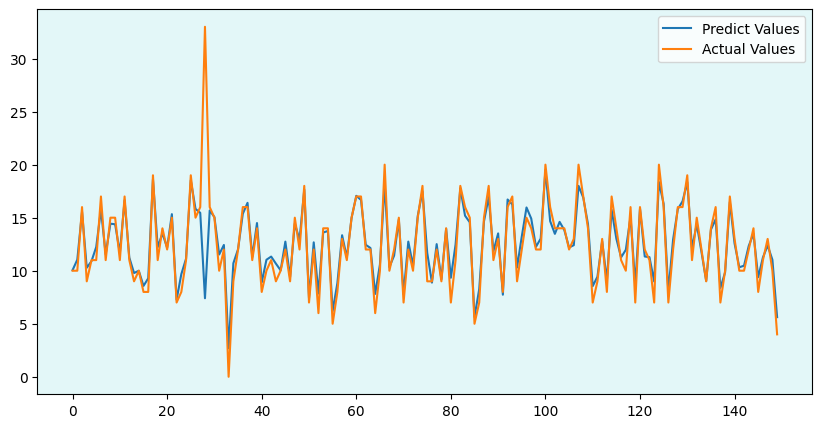

In [122]:
plt.figure(figsize=(10, 5))
plt.gca().set_facecolor('#e3f7f8')
plt.plot(y_pred_sgd_reg[:150], label = 'Predict Values')
plt.plot(y_val.values[:150], label = 'Actual Values')
plt.legend()

In [83]:
knn_reg_model = KNeighborsRegressor()
cv_score = cross_val_score(knn_reg_model, X_tr, y_tr, cv=5)

cv_score_norm = cross_val_score(knn_reg_model, X_tr_normalized, y_tr, cv=5)

cv_score_stan = cross_val_score(knn_reg_model, X_tr_scaled, y_tr, cv=5)

print(f"Cross-validation mean scores (base data): {cv_score.mean()}")
print(f"Cross-validation median scores (base data): {np.median(cv_score)}")
print("\n")
print(f"Cross-validation mean scores (normalized data): {cv_score_norm.mean()}")
print(f"Cross-validation median scores (normalized data): {np.median(cv_score_norm)}")
print("\n")
print(f"Cross-validation mean scores (scaled data): {cv_score_stan.mean()}")
print(f"Cross-validation median scores (scaled data): {np.median(cv_score_stan)}")

Cross-validation mean scores (base data): 0.5494235662879715
Cross-validation median scores (base data): 0.5643015814108665


Cross-validation mean scores (normalized data): 0.3488936295489756
Cross-validation median scores (normalized data): 0.36245170912414904


Cross-validation mean scores (scaled data): 0.4830813322895282
Cross-validation median scores (scaled data): 0.48154867352011876


In [86]:
knn_reg_model = KNeighborsRegressor()
param_grid = { 'n_neighbors' : [11,13,15, 17, 18, 20],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
grid_search = GridSearchCV(knn_reg_model, param_grid=param_grid, cv=5)
grid_search.fit(X_tr, y_tr)
print(grid_search.best_score_)
print(grid_search.best_estimator_)

0.6172412368150105
KNeighborsRegressor(metric='manhattan', n_neighbors=18, weights='distance')


In [89]:
knn_reg_model = KNeighborsRegressor()
param_grid = { 'n_neighbors' : [15, 17, 18, 20, 22, 24],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
grid_search = GridSearchCV(knn_reg_model, param_grid=param_grid, cv=5)
grid_search.fit(X_tr_normalized, y_tr)
print(grid_search.best_score_)
print(grid_search.best_estimator_)

0.41901503308735794
KNeighborsRegressor(metric='manhattan', n_neighbors=20, weights='distance')


In [90]:
knn_reg_model = KNeighborsRegressor()
param_grid = { 'n_neighbors' : [15, 17, 18, 20, 22, 24],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
grid_search = GridSearchCV(knn_reg_model, param_grid=param_grid, cv=5)
grid_search.fit(X_tr_scaled, y_tr)
print(grid_search.best_score_)
print(grid_search.best_estimator_)

0.5342689505621985
KNeighborsRegressor(n_neighbors=20, weights='distance')


In [66]:
y_pred_knn_reg = grid_search.predict(X_val)
print(f'MAE: {mean_absolute_error(y_true=y_val, y_pred=y_pred_ridge_reg)}')
print(f'MSE: {mean_squared_error(y_true=y_val, y_pred=y_pred_ridge_reg)}')
print(f'R2: {r2_score(y_true=y_val, y_pred=y_pred_ridge_reg)}')

MAE: 0.4328731018579768
MSE: 2.903343498045562
R2: 0.7894930548743414


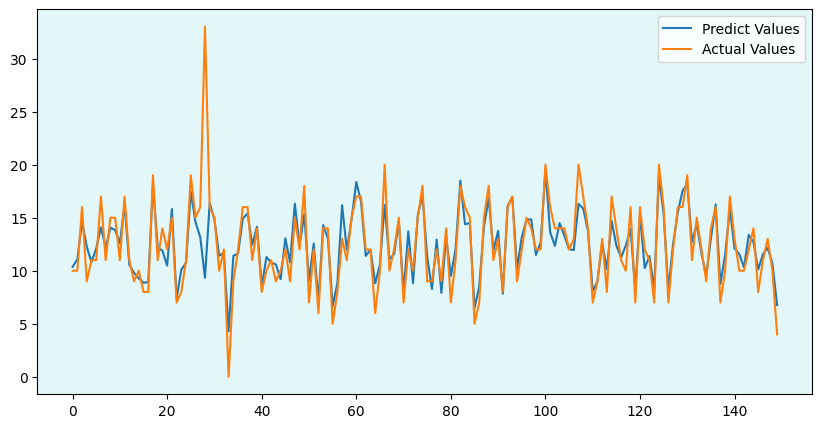

In [123]:
plt.figure(figsize=(10, 5))
plt.gca().set_facecolor('#e3f7f8')
plt.plot(y_pred_knn_reg[:150], label = 'Predict Values')
plt.plot(y_val.values[:150], label = 'Actual Values')
plt.legend()